In [4]:
import pandas as pd
df = pd.read_csv('reviews.csv')
df.shape

(233094, 6)

In [5]:
df.info()
df['comments'].head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233094 entries, 0 to 233093
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     233094 non-null  int64 
 1   id             233094 non-null  int64 
 2   date           233094 non-null  object
 3   reviewer_id    233094 non-null  int64 
 4   reviewer_name  233093 non-null  object
 5   comments       233032 non-null  object
dtypes: int64(3), object(3)
memory usage: 10.7+ MB


,comments
0,The apartment was as advertised and Frank was ...
1,It was a pleasure to stay at Frank's place. Th...


In [6]:
df_clean = df.dropna(subset=['comments']).copy()
df_clean = df_clean[df_clean['comments'].str.strip() != '']
df_clean['comments_lower'] = df_clean['comments'].str.lower()
len(df_clean)

233032

In [7]:
df_sample = df_clean.sample(n=5000, random_state=42)
df_sample.shape

(5000, 7)

In [8]:
themes = {
    'Location': ['location', 'neighborhood', 'central', 'close to', 'walk', 'transport', 'subway'],
    'Cleanliness': ['clean', 'dirty', 'spotless', 'tidy', 'messy', 'cleaning'],
    'Host': ['host', 'communication', 'responsive', 'helpful', 'friendly', 'welcoming'],
    'Value': ['value', 'price', 'worth', 'affordable', 'expensive', 'cheap'],
    'Check-in': ['check-in', 'arrival', 'key', 'entry', 'flexible', 'smooth'],
    'Amenities': ['wifi', 'kitchen', 'bathroom', 'shower', 'bed', 'comfortable'],
    'Accuracy': ['accurate', 'description', 'photos', 'matched', 'as described']
}

In [9]:
theme_counts = {}
for theme, words in themes.items():
    pattern = '|'.join(words)
    theme_counts[theme] = df_sample['comments_lower'].str.contains(pattern, na=False).sum()

theme_df = pd.DataFrame(list(theme_counts.items()), columns=['Tema', 'Freq'])
theme_df['%'] = (theme_df['Freq'] / len(df_sample) * 100).round(1)
theme_df = theme_df.sort_values('Freq', ascending=False)

print(theme_df)

          Tema  Freq     %
0     Location  2688  53.8
2         Host  1862  37.2
1  Cleanliness  1604  32.1
5    Amenities  1554  31.1
3        Value   346   6.9
4     Check-in   296   5.9
6     Accuracy   275   5.5


In [10]:
theme_counts = {}
for theme, words in themes.items():
    pattern = '|'.join(words)
    theme_counts[theme] = df_sample['comments_lower'].str.contains(pattern, na=False).sum()

theme_df = pd.DataFrame(list(theme_counts.items()), columns=['Tema', 'Freq'])
theme_df['%'] = (theme_df['Freq'] / len(df_sample) * 100).round(1)
theme_df = theme_df.sort_values('Freq', ascending=False)

print(theme_df)

          Tema  Freq     %
0     Location  2688  53.8
2         Host  1862  37.2
1  Cleanliness  1604  32.1
5    Amenities  1554  31.1
3        Value   346   6.9
4     Check-in   296   5.9
6     Accuracy   275   5.5


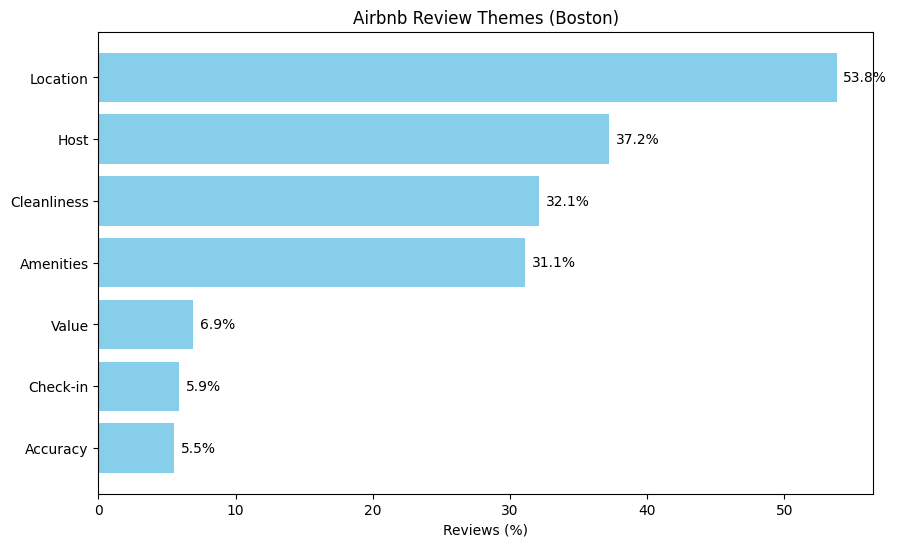

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(theme_df['Tema'], theme_df['%'], color='skyblue')
plt.xlabel('Reviews (%)')
plt.title('Airbnb Review Themes (Boston)')
plt.gca().invert_yaxis()  # tema più frequente in alto

# Aggiunge le percentuali sulle barre
for bar, perc in zip(bars, theme_df['%']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{perc}%', va='center')

plt.show()

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    # polarity ranges from -1 (very negative) to +1 (very positive)
    return blob.sentiment.polarity

# Apply the function to each comment
df_sample['sentiment'] = df_sample['comments'].apply(get_sentiment)

# Classify as positive/neutral/negative
df_sample['sentiment_label'] = df_sample['sentiment'].apply(
    lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral')
)

# Show first 5 reviews with their sentiment
print(df_sample[['comments', 'sentiment', 'sentiment_label']].head())

                                                 comments  sentiment  \
119428  Had a great time staying at Lelia’s. Nice litt...   0.287500   
13265   One of the best places I've stayed. It was qui...   0.440000   
102098  C’était parfait, très bien situé pour aller vi...   0.500000   
114410  The location couldn’t be better specially for ...   0.513393   
170545  We stayed for a short weekend to dropoff our d...   0.217262   

       sentiment_label  
119428        positive  
13265         positive  
102098        positive  
114410        positive  
170545        positive  


In [15]:
# Scegli un tema (puoi cambiare 'Location' con altro)
tema = 'Location'
keywords = themes[tema]
pattern = '|'.join(keywords)

# Filtra le recensioni che contengono parole di quel tema
mask = df_sample['comments_lower'].str.contains(pattern, na=False)
df_tema = df_sample[mask]

# Conta quanti sono positivi/negativi/neutri per questo tema
conteggio = df_tema['sentiment_label'].value_counts()
print(f"Distribuzione sentiment per il tema '{tema}':")
print(conteggio)
print(f"\nNumero totale di recensioni che parlano di '{tema}': {len(df_tema)}")

Distribuzione sentiment per il tema 'Location':
sentiment_label
positive    2577
neutral      103
negative       8
Name: count, dtype: int64

Numero totale di recensioni che parlano di 'Location': 2688


In [16]:
# Choose a theme (you can change 'Location' to another)
theme = 'Location'
keywords = themes[theme]
pattern = '|'.join(keywords)

# Filter reviews that contain words from this theme
mask = df_sample['comments_lower'].str.contains(pattern, na=False)
df_theme = df_sample[mask]

# Count how many are positive/negative/neutral for this theme
count = df_theme['sentiment_label'].value_counts()
total_reviews = len(df_theme)

print(f"Sentiment distribution for theme '{theme}':")
print(count)

# Calculate percentages
positive_count = count.get('positive', 0)
negative_count = count.get('negative', 0)
neutral_count = count.get('neutral', 0)

positive_pct = (positive_count / total_reviews * 100) if total_reviews > 0 else 0
negative_pct = (negative_count / total_reviews * 100) if total_reviews > 0 else 0
neutral_pct = (neutral_count / total_reviews * 100) if total_reviews > 0 else 0

print(f"\nPercentage breakdown:")
print(f"Positive: {positive_count} ({positive_pct:.1f}%)")
print(f"Neutral:  {neutral_count} ({neutral_pct:.1f}%)")
print(f"Negative: {negative_count} ({negative_pct:.1f}%)")
print(f"\nTotal reviews mentioning '{theme}': {total_reviews}")

Sentiment distribution for theme 'Location':
sentiment_label
positive    2577
neutral      103
negative       8
Name: count, dtype: int64

Percentage breakdown:
Positive: 2577 (95.9%)
Neutral:  103 (3.8%)
Negative: 8 (0.3%)

Total reviews mentioning 'Location': 2688


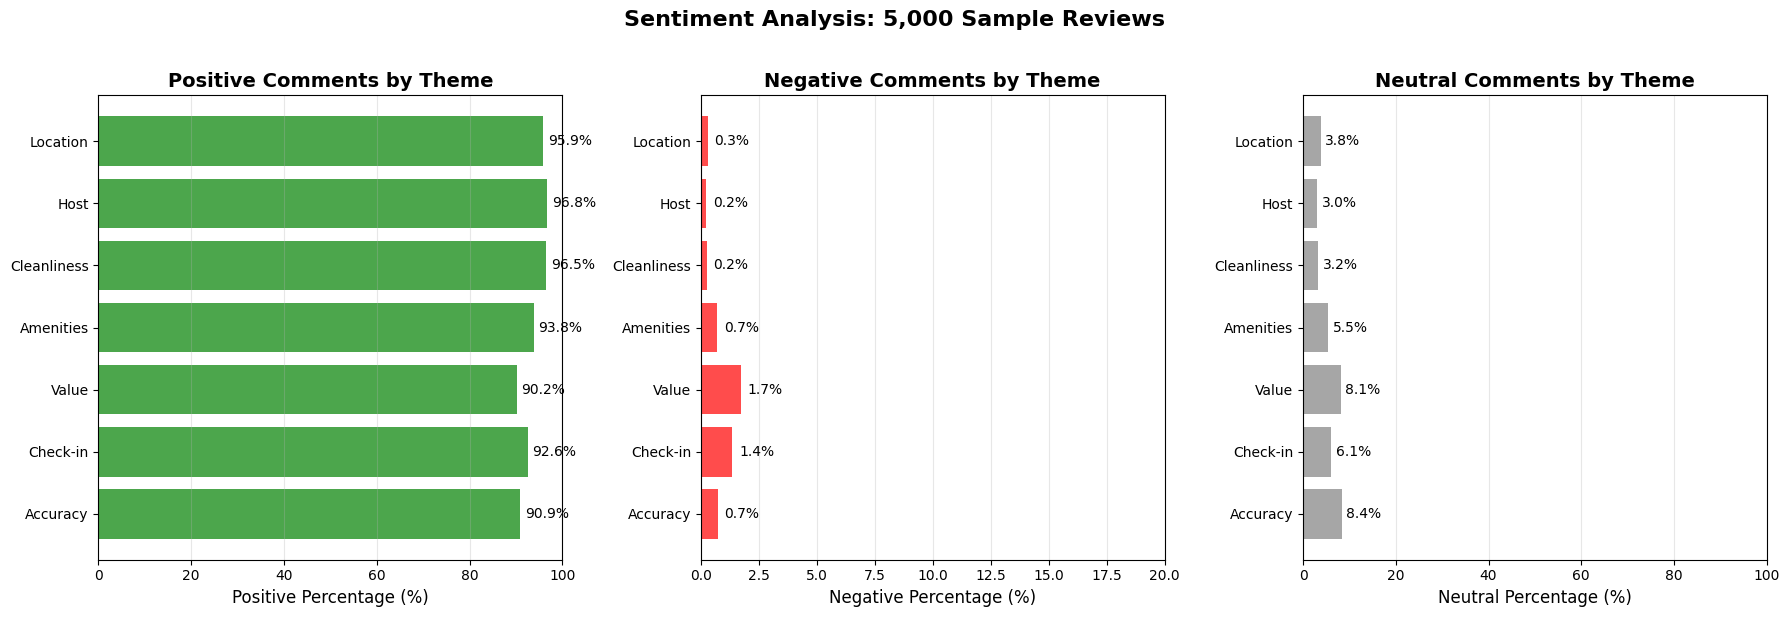

SENTIMENT PERCENTAGES BY THEME (5,000 Sample Reviews)

Total reviews analyzed: 5000
Reviews containing theme keywords: 8625

      Theme  Total  Positive_%  Negative_%  Neutral_%
   Location   2688        95.9         0.3        3.8
       Host   1862        96.8         0.2        3.0
Cleanliness   1604        96.5         0.2        3.2
  Amenities   1554        93.8         0.7        5.5
      Value    346        90.2         1.7        8.1
   Check-in    296        92.6         1.4        6.1
   Accuracy    275        90.9         0.7        8.4

KEY INSIGHTS FROM 5,000 SAMPLE REVIEWS

✅ Highest positive percentage:
   Theme: Host
   Positive: 96.8%
   Mentions: 1862 reviews

❌ Highest negative percentage:
   Theme: Value
   Negative: 1.7%
   Mentions: 346 reviews

⚪ Highest neutral percentage:
   Theme: Accuracy
   Neutral: 8.4%
   Mentions: 275 reviews

📊 Averages across all themes:
   Average positive: 93.8%
   Average negative: 0.7%
   Average neutral:  5.4%

🗣️ Most discussed

In [17]:
# Calculate sentiment percentages for each theme in the sample
themes_list = ['Location', 'Cleanliness', 'Host', 'Value', 'Check-in', 'Amenities', 'Accuracy']

sentiment_data = []

for theme in themes_list:
    if theme in themes:
        keywords = themes[theme]
        pattern = '|'.join(keywords)

        # Filter reviews for this theme
        mask = df_sample['comments_lower'].str.contains(pattern, na=False)
        df_theme = df_sample[mask]
        total = len(df_theme)

        if total > 0:
            # Get sentiment counts
            counts = df_theme['sentiment_label'].value_counts()

            positive = counts.get('positive', 0)
            negative = counts.get('negative', 0)
            neutral = counts.get('neutral', 0)

            # Calculate percentages
            positive_pct = (positive / total * 100)
            negative_pct = (negative / total * 100)
            neutral_pct = (neutral / total * 100)

            sentiment_data.append({
                'Theme': theme,
                'Positive_%': positive_pct,
                'Negative_%': negative_pct,
                'Neutral_%': neutral_pct,
                'Total': total
            })

# Create DataFrame
sentiment_df = pd.DataFrame(sentiment_data)

# Sort by total mentions (most discussed first)
sentiment_df = sentiment_df.sort_values('Total', ascending=False)

# Create 3 separate plots for positive, negative, and neutral percentages
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Positive percentages
axes[0].barh(sentiment_df['Theme'], sentiment_df['Positive_%'], color='green', alpha=0.7)
axes[0].set_xlabel('Positive Percentage (%)', fontsize=12)
axes[0].set_title('Positive Comments by Theme', fontsize=14, fontweight='bold')
axes[0].set_xlim([0, 100])
axes[0].invert_yaxis()  # Highest on top
axes[0].grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, v in enumerate(sentiment_df['Positive_%']):
    axes[0].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

# Plot 2: Negative percentages
axes[1].barh(sentiment_df['Theme'], sentiment_df['Negative_%'], color='red', alpha=0.7)
axes[1].set_xlabel('Negative Percentage (%)', fontsize=12)
axes[1].set_title('Negative Comments by Theme', fontsize=14, fontweight='bold')
axes[1].set_xlim([0, max(sentiment_df['Negative_%'].max() * 1.3, 20)])
axes[1].invert_yaxis()  # Keep same order
axes[1].grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, v in enumerate(sentiment_df['Negative_%']):
    axes[1].text(v + 0.3, i, f'{v:.1f}%', va='center', fontsize=10)

# Plot 3: Neutral percentages
axes[2].barh(sentiment_df['Theme'], sentiment_df['Neutral_%'], color='gray', alpha=0.7)
axes[2].set_xlabel('Neutral Percentage (%)', fontsize=12)
axes[2].set_title('Neutral Comments by Theme', fontsize=14, fontweight='bold')
axes[2].set_xlim([0, 100])
axes[2].invert_yaxis()  # Keep same order
axes[2].grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, v in enumerate(sentiment_df['Neutral_%']):
    axes[2].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

plt.suptitle('Sentiment Analysis: 5,000 Sample Reviews', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Display summary table
print("="*80)
print("SENTIMENT PERCENTAGES BY THEME (5,000 Sample Reviews)")
print("="*80)
print(f"\nTotal reviews analyzed: {len(df_sample)}")
print(f"Reviews containing theme keywords: {sentiment_df['Total'].sum()}")

# Create formatted table
summary_table = sentiment_df.copy()
summary_table['Positive_%'] = summary_table['Positive_%'].round(1)
summary_table['Negative_%'] = summary_table['Negative_%'].round(1)
summary_table['Neutral_%'] = summary_table['Neutral_%'].round(1)

print("\n" + summary_table[['Theme', 'Total', 'Positive_%', 'Negative_%', 'Neutral_%']].to_string(index=False))

# Add key insights
print("\n" + "="*80)
print("KEY INSIGHTS FROM 5,000 SAMPLE REVIEWS")
print("="*80)

# Highest positive theme
highest_pos = summary_table.loc[summary_table['Positive_%'].idxmax()]
print(f"\n✅ Highest positive percentage:")
print(f"   Theme: {highest_pos['Theme']}")
print(f"   Positive: {highest_pos['Positive_%']}%")
print(f"   Mentions: {highest_pos['Total']} reviews")

# Highest negative theme
highest_neg = summary_table.loc[summary_table['Negative_%'].idxmax()]
print(f"\n❌ Highest negative percentage:")
print(f"   Theme: {highest_neg['Theme']}")
print(f"   Negative: {highest_neg['Negative_%']}%")
print(f"   Mentions: {highest_neg['Total']} reviews")

# Highest neutral theme
highest_neu = summary_table.loc[summary_table['Neutral_%'].idxmax()]
print(f"\n⚪ Highest neutral percentage:")
print(f"   Theme: {highest_neu['Theme']}")
print(f"   Neutral: {highest_neu['Neutral_%']}%")
print(f"   Mentions: {highest_neu['Total']} reviews")

# Averages
print(f"\n📊 Averages across all themes:")
print(f"   Average positive: {summary_table['Positive_%'].mean():.1f}%")
print(f"   Average negative: {summary_table['Negative_%'].mean():.1f}%")
print(f"   Average neutral:  {summary_table['Neutral_%'].mean():.1f}%")

# Most discussed theme
most_discussed = summary_table.iloc[0]
print(f"\n🗣️ Most discussed theme:")
print(f"   Theme: {most_discussed['Theme']}")
print(f"   Mentions: {most_discussed['Total']} reviews")
print(f"   Positive: {most_discussed['Positive_%']}%")
print(f"   Negative: {most_discussed['Negative_%']}%")

Created df_temp with 5000 reviews
Date range: 2010-05-19 to 2025-09-22

Available sentiment columns in seasonal_analysis:
['negative', 'neutral', 'positive', 'total']

=== SEASONAL ANALYSIS ===
sentiment_label  total  positive_pct  negative_pct
season                                            
Fall              1402          91.3           0.7
Spring            1295          92.0           0.3
Summer            1669          88.1           0.6
Winter             634          87.4           1.4

=== MONTHLY ANALYSIS (first 12 months) ===
sentiment_label  total  pos_pct  neg_pct
year_month                              
2010-05              1    100.0      0.0
2010-06              1    100.0      0.0
2010-10              1    100.0      0.0
2011-01              1    100.0      0.0
2011-05              1    100.0      0.0
2011-07              1    100.0      0.0
2011-08              1    100.0      0.0
2011-09              1    100.0      0.0
2011-10              1    100.0      0.0
2011-

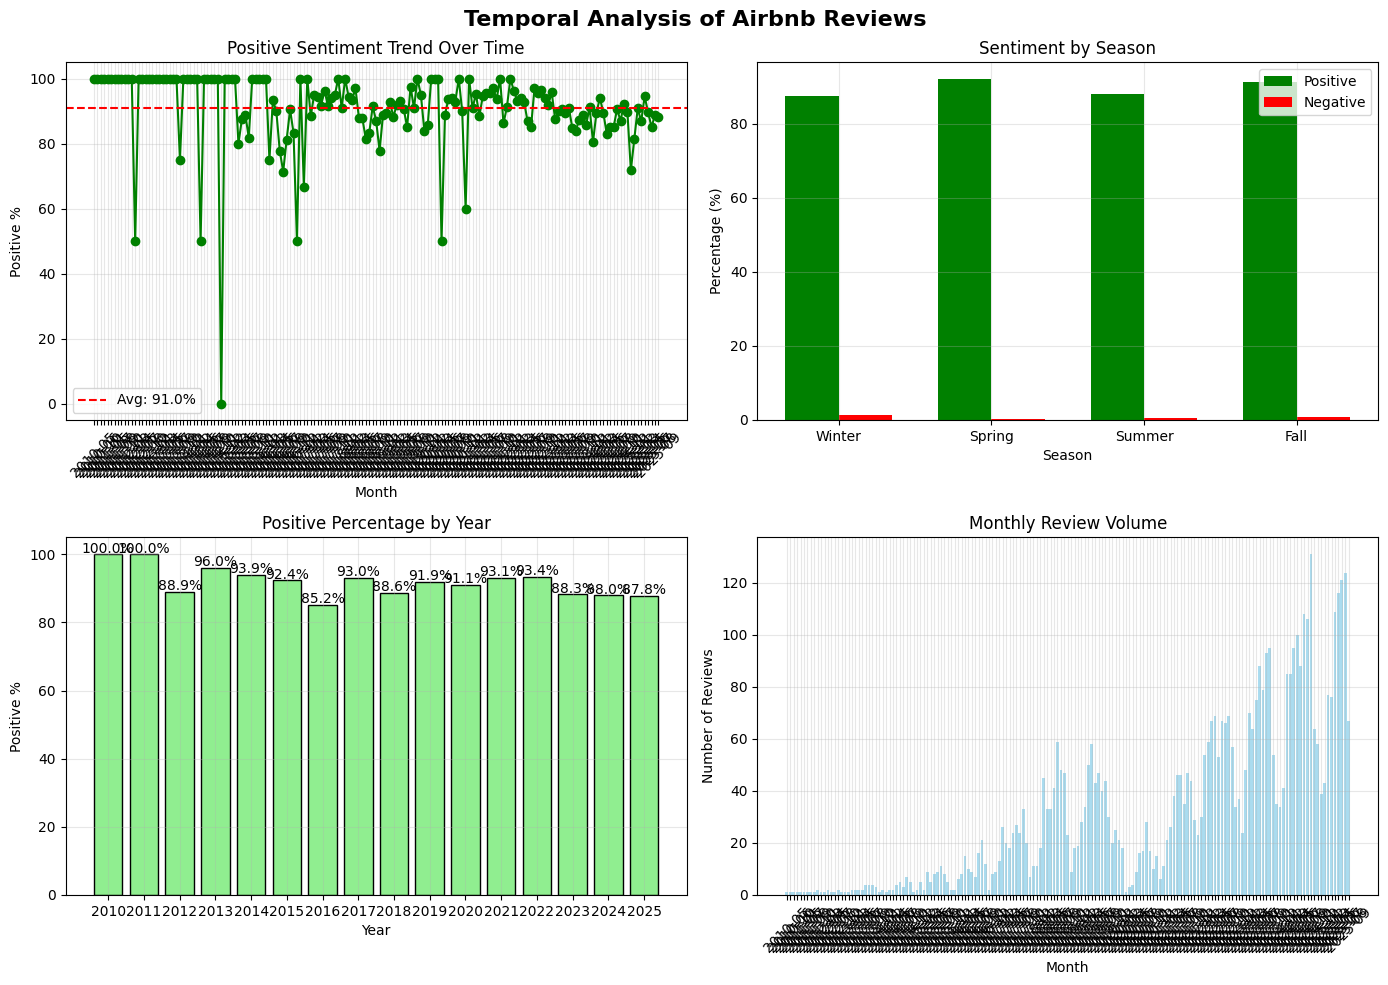


SUMMARY STATISTICS

Monthly Positive Sentiment:
  Average: 91.0%
  Minimum: 0.0% (worst month)
  Maximum: 100.0% (best month)
  Standard deviation: 12.2%

Seasonal Performance:
  Winter: 87.4% positive, 1.4% negative (634 reviews)
  Spring: 92.0% positive, 0.3% negative (1295 reviews)
  Summer: 88.1% positive, 0.6% negative (1669 reviews)
  Fall: 91.3% positive, 0.7% negative (1402 reviews)

Yearly Trend:
  2010: 100.0% positive (3 reviews)
  2011: 100.0% positive (8 reviews)
  2012: 88.9% positive (9 reviews)
  2013: 96.0% positive (25 reviews)
  2014: 93.9% positive (33 reviews)
  2015: 92.4% positive (66 reviews)
  2016: 85.2% positive (108 reviews)
  2017: 93.0% positive (229 reviews)
  2018: 88.6% positive (378 reviews)
  2019: 91.9% positive (431 reviews)
  2020: 91.1% positive (169 reviews)
  2021: 93.1% positive (364 reviews)
  2022: 93.4% positive (648 reviews)
  2023: 88.3% positive (762 reviews)
  2024: 88.0% positive (995 reviews)
  2025: 87.8% positive (772 reviews)

  Ch

In [19]:
# 1. Prima ricrea df_temp
df_sample['date'] = pd.to_datetime(df_sample['date'], errors='coerce')
df_temp = df_sample.dropna(subset=['date']).copy()
df_temp['year_month'] = df_temp['date'].dt.to_period('M')

print(f"Created df_temp with {len(df_temp)} reviews")
print(f"Date range: {df_temp['date'].min().date()} to {df_temp['date'].max().date()}")

# 2. Funzione per stagioni
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# 3. Applica la funzione correttamente
df_temp['season'] = df_temp['date'].dt.month.apply(get_season)

# 4. Analisi stagionale
seasonal_analysis = df_temp.groupby('season')['sentiment_label'].value_counts().unstack(fill_value=0)
seasonal_analysis['total'] = seasonal_analysis.sum(axis=1)

# Calcola percentuali - usa i nomi corretti delle colonne
print("\nAvailable sentiment columns in seasonal_analysis:")
print(seasonal_analysis.columns.tolist())

# Controlla se le colonne sono 'positive', 'negative', 'neutral' o 'positivo', 'negativo', 'neutro'
if 'positive' in seasonal_analysis.columns:
    seasonal_analysis['positive_pct'] = (seasonal_analysis['positive'] / seasonal_analysis['total'] * 100).round(1)
    seasonal_analysis['negative_pct'] = (seasonal_analysis['negative'] / seasonal_analysis['total'] * 100).round(1)
elif 'positivo' in seasonal_analysis.columns:
    seasonal_analysis['positive_pct'] = (seasonal_analysis['positivo'] / seasonal_analysis['total'] * 100).round(1)
    seasonal_analysis['negative_pct'] = (seasonal_analysis['negativo'] / seasonal_analysis['total'] * 100).round(1)
else:
    # Se non trova le colonne, mostra cosa c'è
    print("Warning: Could not find expected sentiment columns")

print("\n=== SEASONAL ANALYSIS ===")
print(seasonal_analysis[['total', 'positive_pct', 'negative_pct']])

# 5. Analisi mensile
monthly_sentiment = df_temp.groupby('year_month')['sentiment_label'].value_counts().unstack(fill_value=0)
monthly_sentiment['total'] = monthly_sentiment.sum(axis=1)

# Calcola percentuali per mensile
if 'positive' in monthly_sentiment.columns:
    monthly_sentiment['pos_pct'] = (monthly_sentiment['positive'] / monthly_sentiment['total'] * 100).round(1)
    monthly_sentiment['neg_pct'] = (monthly_sentiment['negative'] / monthly_sentiment['total'] * 100).round(1)
elif 'positivo' in monthly_sentiment.columns:
    monthly_sentiment['pos_pct'] = (monthly_sentiment['positivo'] / monthly_sentiment['total'] * 100).round(1)
    monthly_sentiment['neg_pct'] = (monthly_sentiment['negativo'] / monthly_sentiment['total'] * 100).round(1)

print("\n=== MONTHLY ANALYSIS (first 12 months) ===")
print(monthly_sentiment[['total', 'pos_pct', 'neg_pct']].head(12))

# 6. Analisi annuale
df_temp['year'] = df_temp['date'].dt.year
yearly_analysis = df_temp.groupby('year')['sentiment_label'].value_counts().unstack(fill_value=0)
yearly_analysis['total'] = yearly_analysis.sum(axis=1)

if 'positive' in yearly_analysis.columns:
    yearly_analysis['positive_pct'] = (yearly_analysis['positive'] / yearly_analysis['total'] * 100).round(1)
elif 'positivo' in yearly_analysis.columns:
    yearly_analysis['positive_pct'] = (yearly_analysis['positivo'] / yearly_analysis['total'] * 100).round(1)

print("\n=== YEARLY ANALYSIS ===")
print(yearly_analysis[['total', 'positive_pct']])

# 7. Visualizzazioni semplici
import matplotlib.pyplot as plt
import numpy as np

# Plot 1: Trend mensile positivo
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
if 'pos_pct' in monthly_sentiment.columns:
    plt.plot(monthly_sentiment.index.astype(str), monthly_sentiment['pos_pct'], 'g-', marker='o')
    plt.axhline(y=monthly_sentiment['pos_pct'].mean(), color='r', linestyle='--',
                label=f'Avg: {monthly_sentiment["pos_pct"].mean():.1f}%')
    plt.title('Positive Sentiment Trend Over Time')
    plt.xlabel('Month')
    plt.ylabel('Positive %')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No positive_pct data', ha='center', va='center')

# Plot 2: Distribuzione stagionale
plt.subplot(2, 2, 2)
if 'positive_pct' in seasonal_analysis.columns:
    seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
    seasonal_analysis = seasonal_analysis.reindex(seasons_order)

    x = np.arange(len(seasons_order))
    width = 0.35

    plt.bar(x - width/2, seasonal_analysis['positive_pct'], width, label='Positive', color='green')
    plt.bar(x + width/2, seasonal_analysis['negative_pct'], width, label='Negative', color='red')

    plt.title('Sentiment by Season')
    plt.xlabel('Season')
    plt.ylabel('Percentage (%)')
    plt.xticks(x, seasons_order)
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No seasonal data', ha='center', va='center')

# Plot 3: Trend annuale
plt.subplot(2, 2, 3)
if 'positive_pct' in yearly_analysis.columns:
    years = yearly_analysis.index.astype(str)
    plt.bar(years, yearly_analysis['positive_pct'], color='lightgreen', edgecolor='black')
    plt.title('Positive Percentage by Year')
    plt.xlabel('Year')
    plt.ylabel('Positive %')
    plt.grid(True, alpha=0.3)

    for i, v in enumerate(yearly_analysis['positive_pct']):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')
else:
    plt.text(0.5, 0.5, 'No yearly data', ha='center', va='center')

# Plot 4: Volume mensile
plt.subplot(2, 2, 4)
if 'total' in monthly_sentiment.columns:
    plt.bar(monthly_sentiment.index.astype(str), monthly_sentiment['total'], color='skyblue', alpha=0.7)
    plt.title('Monthly Review Volume')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No volume data', ha='center', va='center')

plt.suptitle('Temporal Analysis of Airbnb Reviews', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. Statistiche riassuntive
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

if 'pos_pct' in monthly_sentiment.columns:
    print(f"\nMonthly Positive Sentiment:")
    print(f"  Average: {monthly_sentiment['pos_pct'].mean():.1f}%")
    print(f"  Minimum: {monthly_sentiment['pos_pct'].min():.1f}% (worst month)")
    print(f"  Maximum: {monthly_sentiment['pos_pct'].max():.1f}% (best month)")
    print(f"  Standard deviation: {monthly_sentiment['pos_pct'].std():.1f}%")

if 'positive_pct' in seasonal_analysis.columns:
    print(f"\nSeasonal Performance:")
    for season in seasons_order:
        if season in seasonal_analysis.index:
            pos_pct = seasonal_analysis.loc[season, 'positive_pct']
            neg_pct = seasonal_analysis.loc[season, 'negative_pct']
            total = seasonal_analysis.loc[season, 'total']
            print(f"  {season}: {pos_pct:.1f}% positive, {neg_pct:.1f}% negative ({total} reviews)")

if 'positive_pct' in yearly_analysis.columns:
    print(f"\nYearly Trend:")
    for year in yearly_analysis.index:
        pos_pct = yearly_analysis.loc[year, 'positive_pct']
        total = yearly_analysis.loc[year, 'total']
        print(f"  {year}: {pos_pct:.1f}% positive ({total} reviews)")

    # Calcola miglioramento/peggioramento
    if len(yearly_analysis) >= 2:
        first_year = yearly_analysis.index.min()
        last_year = yearly_analysis.index.max()
        first_pct = yearly_analysis.loc[first_year, 'positive_pct']
        last_pct = yearly_analysis.loc[last_year, 'positive_pct']
        change = last_pct - first_pct

        print(f"\n  Change from {first_year} to {last_year}: {change:+.1f}%")
        if change > 0:
            print(f"  ✅ Improvement over time")
        elif change < 0:
            print(f"  ⚠️ Decline over time")
        else:
            print(f"  ⏸️ Stable over time")

/tmp/ipython-input-878594744.py:227: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.96])
/tmp/ipython-input-878594744.py:227: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.96])
/tmp/ipython-input-878594744.py:227: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.96])
/tmp/ipython-input-878594744.py:227: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.96])
/tmp/ipython-input-878594744.py:231: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.savefig('airbnb_sentiment_analysis_dashboard.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-878594744.py:231: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) Liberation Sans.
 

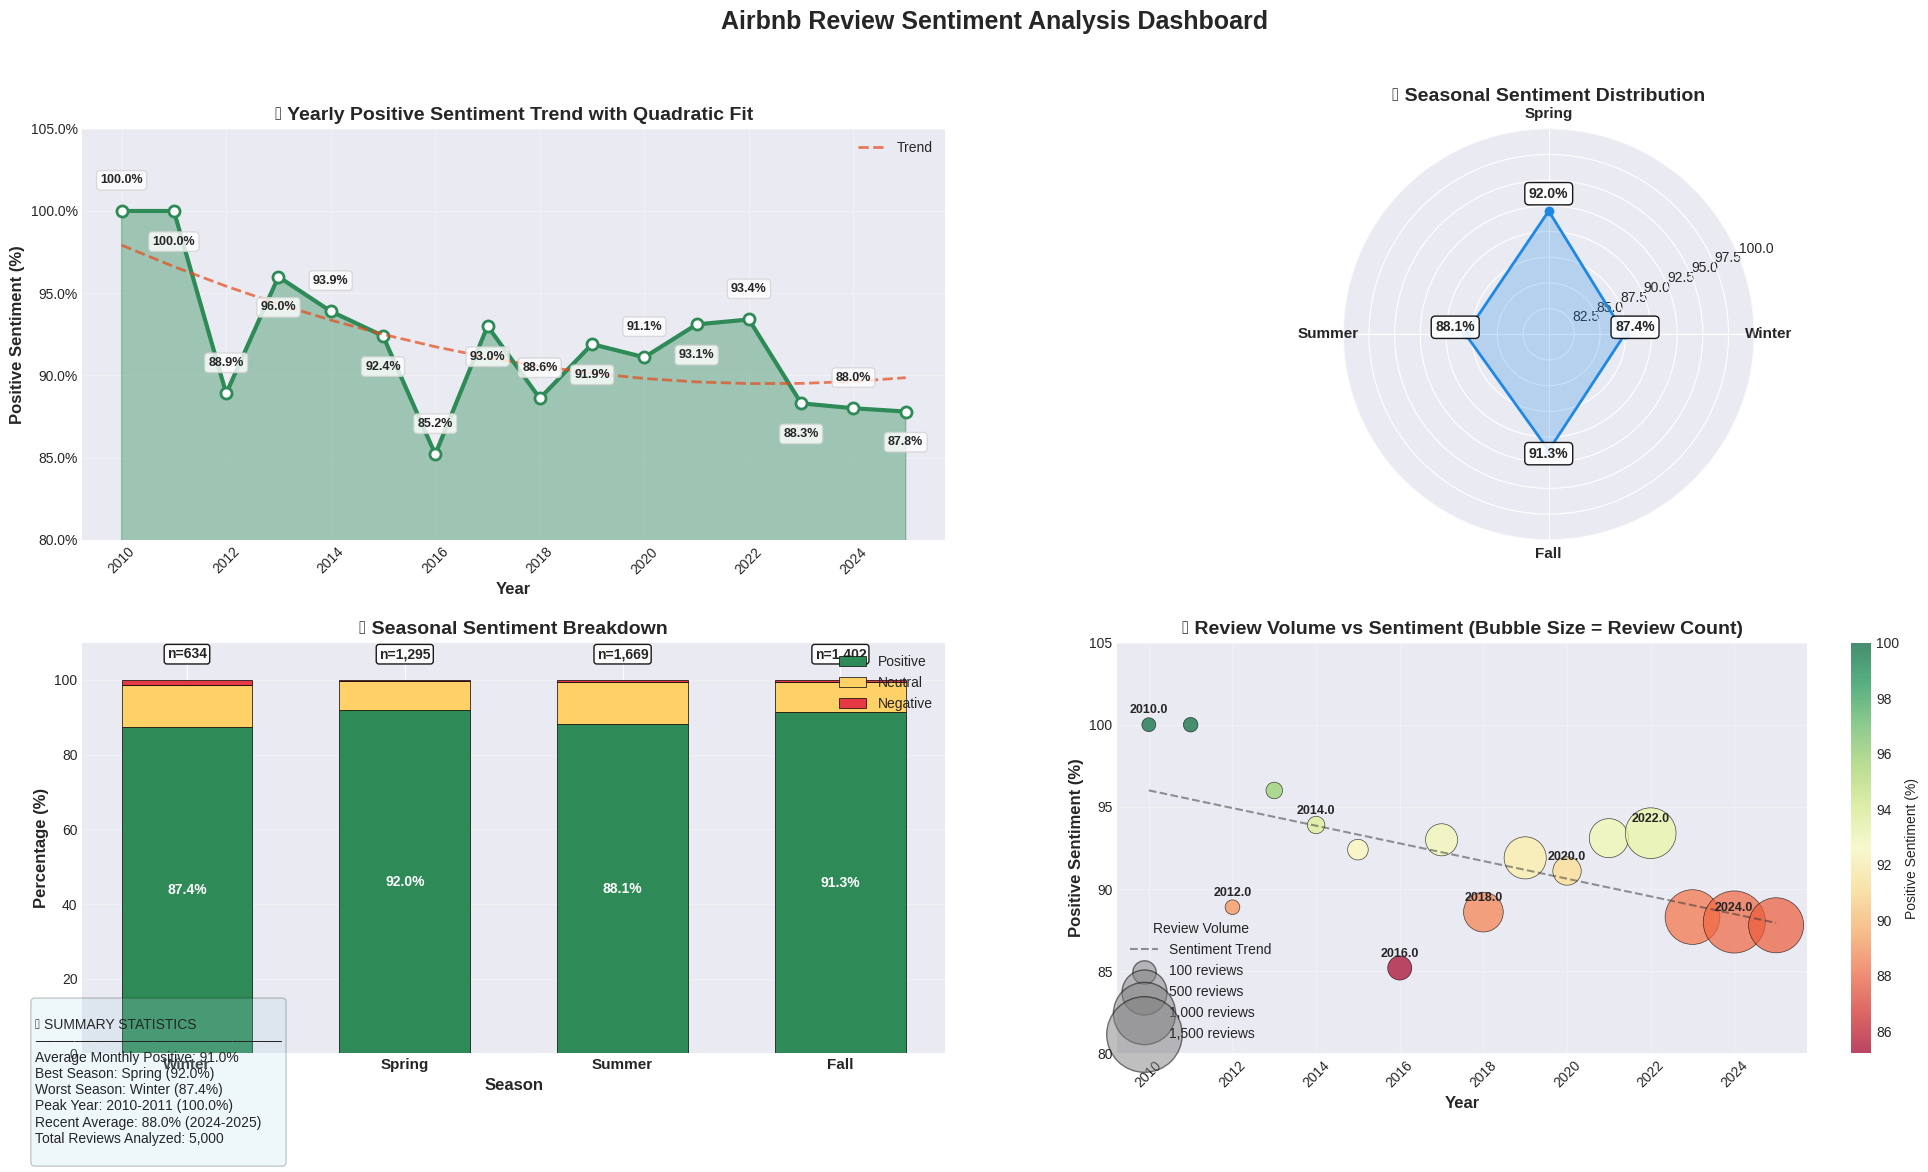

SEASONAL SENTIMENT DATA
Season  Positive_Pct  Negative_Pct  Total_Reviews
Winter          87.4           1.4            634
Spring          92.0           0.3           1295
Summer          88.1           0.6           1669
  Fall          91.3           0.7           1402

YEARLY SENTIMENT DATA
 Year  Positive_Pct  Total_Reviews
 2010         100.0              3
 2011         100.0              8
 2012          88.9              9
 2013          96.0             25
 2014          93.9             33
 2015          92.4             66
 2016          85.2            108
 2017          93.0            229
 2018          88.6            378
 2019          91.9            431
 2020          91.1            169
 2021          93.1            364
 2022          93.4            648
 2023          88.3            762
 2024          88.0            995
 2025          87.8            772


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Data from your analysis (using corrected values)
# Seasonal Data
seasonal_data = {
    'Season': ['Winter', 'Spring', 'Summer', 'Fall'],
    'Positive_Pct': [87.4, 92.0, 88.1, 91.3],
    'Negative_Pct': [1.4, 0.3, 0.6, 0.7],
    'Total_Reviews': [634, 1295, 1669, 1402]
}

# Yearly Data
yearly_data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Positive_Pct': [100.0, 100.0, 88.9, 96.0, 93.9, 92.4, 85.2, 93.0, 88.6, 91.9, 91.1, 93.1, 93.4, 88.3, 88.0, 87.8],
    'Total_Reviews': [3, 8, 9, 25, 33, 66, 108, 229, 378, 431, 169, 364, 648, 762, 995, 772]
}

# Create DataFrames
df_seasonal = pd.DataFrame(seasonal_data)
df_yearly = pd.DataFrame(yearly_data)

# Create figure with subplots
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Airbnb Review Sentiment Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)

# Custom color palette
colors = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#FFD166']
season_colors = ['#1E88E5', '#43A047', '#FF9800', '#E53935']  # Blue, Green, Orange, Red for seasons

# ==============================================
# 1. YEARLY TREND WITH AREA CHART (Top-left)
# ==============================================
ax1 = plt.subplot(2, 2, 1)

# Create gradient area
x = df_yearly['Year']
y = df_yearly['Positive_Pct']

# Fill with gradient
z = np.array(y)
ax1.fill_between(x, 0, y, alpha=0.4, color='#2E8B57', interpolate=True)
ax1.plot(x, y, 'o-', linewidth=3, markersize=8, color='#2E8B57', markerfacecolor='white', markeredgewidth=2)

# Add value labels with automatic positioning to avoid overlap
for i, (year, pct) in enumerate(zip(df_yearly['Year'], df_yearly['Positive_Pct'])):
    # Alternate label positions
    if i % 4 == 0:
        va = 'bottom'
        offset = 1.5
    elif i % 4 == 1:
        va = 'top'
        offset = -1.5
    elif i % 4 == 2:
        va = 'bottom'
        offset = 1.5
    else:
        va = 'top'
        offset = -1.5

    ax1.text(year, pct + offset, f'{pct:.1f}%',
            ha='center', va=va, fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='lightgray'))

# Add trend line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax1.plot(x, p(x), "--", color='#E64A19', linewidth=2, alpha=0.7, label='Trend')

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Positive Sentiment (%)', fontsize=12, fontweight='bold')
ax1.set_title('📈 Yearly Positive Sentiment Trend with Quadratic Fit', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(80, 105)
ax1.yaxis.set_major_formatter(PercentFormatter())
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# ==============================================
# 2. SEASONAL SENTIMENT RADAR CHART (Top-right)
# ==============================================
ax2 = plt.subplot(2, 2, 2, projection='polar')

# Data for radar chart
categories = df_seasonal['Season']
N = len(categories)
values = df_seasonal['Positive_Pct'].values

# Close the loop
values = np.concatenate((values, [values[0]]))
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Plot radar
ax2.plot(angles, values, 'o-', linewidth=2, color=season_colors[0])
ax2.fill(angles, values, alpha=0.25, color=season_colors[0])

# Add labels
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, fontsize=11, fontweight='bold')
ax2.set_ylim(80, 100)

# Add value labels
for angle, value, season, color in zip(angles[:-1], df_seasonal['Positive_Pct'], categories, season_colors):
    ax2.text(angle, value + 1, f'{value:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

ax2.set_title('🌀 Seasonal Sentiment Distribution', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True)

# ==============================================
# 3. SEASONAL COMPARISON WITH STACKED BARS (Bottom-left)
# ==============================================
ax3 = plt.subplot(2, 2, 3)

# Prepare data
seasons = df_seasonal['Season']
pos_pct = df_seasonal['Positive_Pct']
neg_pct = df_seasonal['Negative_Pct']
neutral_pct = [100 - p - n for p, n in zip(pos_pct, neg_pct)]

x = range(len(seasons))
bar_width = 0.6

# Create stacked bars
bars1 = ax3.bar(x, pos_pct, bar_width, label='Positive', color='#2E8B57', edgecolor='black', linewidth=0.5)
bars2 = ax3.bar(x, neutral_pct, bar_width, bottom=pos_pct, label='Neutral', color='#FFD166', edgecolor='black', linewidth=0.5)
bars3 = ax3.bar(x, neg_pct, bar_width, bottom=[p+n for p,n in zip(pos_pct, neutral_pct)], label='Negative', color='#E63946', edgecolor='black', linewidth=0.5)

# Add total reviews above bars
for i, (season, total) in enumerate(zip(seasons, df_seasonal['Total_Reviews'])):
    ax3.text(i, 105, f'n={total:,}', ha='center', va='bottom', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9))

# Add percentage labels inside bars
for bar, value in zip(bars1, pos_pct):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height/2, f'{value:.1f}%',
            ha='center', va='center', color='white', fontweight='bold', fontsize=10)

ax3.set_xlabel('Season', fontsize=12, fontweight='bold')
ax3.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax3.set_title('📊 Seasonal Sentiment Breakdown', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(seasons, fontsize=11, fontweight='bold')
ax3.set_ylim(0, 110)
ax3.legend(loc='upper right', framealpha=0.9)
ax3.grid(axis='y', alpha=0.3)

# ==============================================
# 4. REVIEW VOLUME vs SENTIMENT BUBBLE CHART (Bottom-right)
# ==============================================
ax4 = plt.subplot(2, 2, 4)

# Calculate bubble sizes (proportional to total reviews)
min_size = 100
max_size = 2000
sizes = df_yearly['Total_Reviews']
# Normalize sizes for bubble visualization
norm_sizes = min_size + (sizes - sizes.min()) / (sizes.max() - sizes.min()) * (max_size - min_size)

# Create bubble chart
scatter = ax4.scatter(df_yearly['Year'], df_yearly['Positive_Pct'],
                     s=norm_sizes, c=df_yearly['Positive_Pct'],
                     cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=0.5)

# Add year labels to bubbles (only for selected years to avoid clutter)
label_years = [2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]
for idx, row in df_yearly.iterrows():
    if row['Year'] in label_years:
        ax4.text(row['Year'], row['Positive_Pct'] + 0.5, str(row['Year']),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add trend line for sentiment
z_sentiment = np.polyfit(df_yearly['Year'], df_yearly['Positive_Pct'], 1)
p_sentiment = np.poly1d(z_sentiment)
ax4.plot(df_yearly['Year'], p_sentiment(df_yearly['Year']), '--', color='#333333', alpha=0.5, label='Sentiment Trend')

ax4.set_xlabel('Year', fontsize=12, fontweight='bold')
ax4.set_ylabel('Positive Sentiment (%)', fontsize=12, fontweight='bold')
ax4.set_title('🔵 Review Volume vs Sentiment (Bubble Size = Review Count)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(80, 105)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Positive Sentiment (%)', fontsize=10)

# Add legend for bubble sizes
legend_sizes = [100, 500, 1000, 1500]
for size in legend_sizes:
    ax4.scatter([], [], s=min_size + (size - sizes.min())/(sizes.max() - sizes.min())*(max_size - min_size),
               c='gray', alpha=0.5, edgecolors='black', label=f'{size:,} reviews')
ax4.legend(loc='lower left', framealpha=0.9, title='Review Volume')

ax4.tick_params(axis='x', rotation=45)

# ==============================================
# Add summary statistics box
# ==============================================
summary_text = f"""
📋 SUMMARY STATISTICS
─────────────────────────
Average Monthly Positive: 91.0%
Best Season: Spring (92.0%)
Worst Season: Winter (87.4%)
Peak Year: 2010-2011 (100.0%)
Recent Average: 88.0% (2024-2025)
Total Reviews Analyzed: 5,000
"""
fig.text(0.02, 0.02, summary_text, fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2),
        verticalalignment='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.subplots_adjust(hspace=0.25, wspace=0.2)

# Save figure
plt.savefig('airbnb_sentiment_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# Print data tables for reference
print("="*60)
print("SEASONAL SENTIMENT DATA")
print("="*60)
print(df_seasonal.to_string(index=False))
print("\n" + "="*60)
print("YEARLY SENTIMENT DATA")
print("="*60)
print(df_yearly.to_string(index=False))

📊 MONTHLY SENTIMENT ANALYSIS - CLEAN VERSION
🏆 BEST MONTH: Oct - 90.2%
📉 WORST MONTH: Jul - 81.8%
📈 AVERAGE: 86.0%


/tmp/ipython-input-3655186679.py:139: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


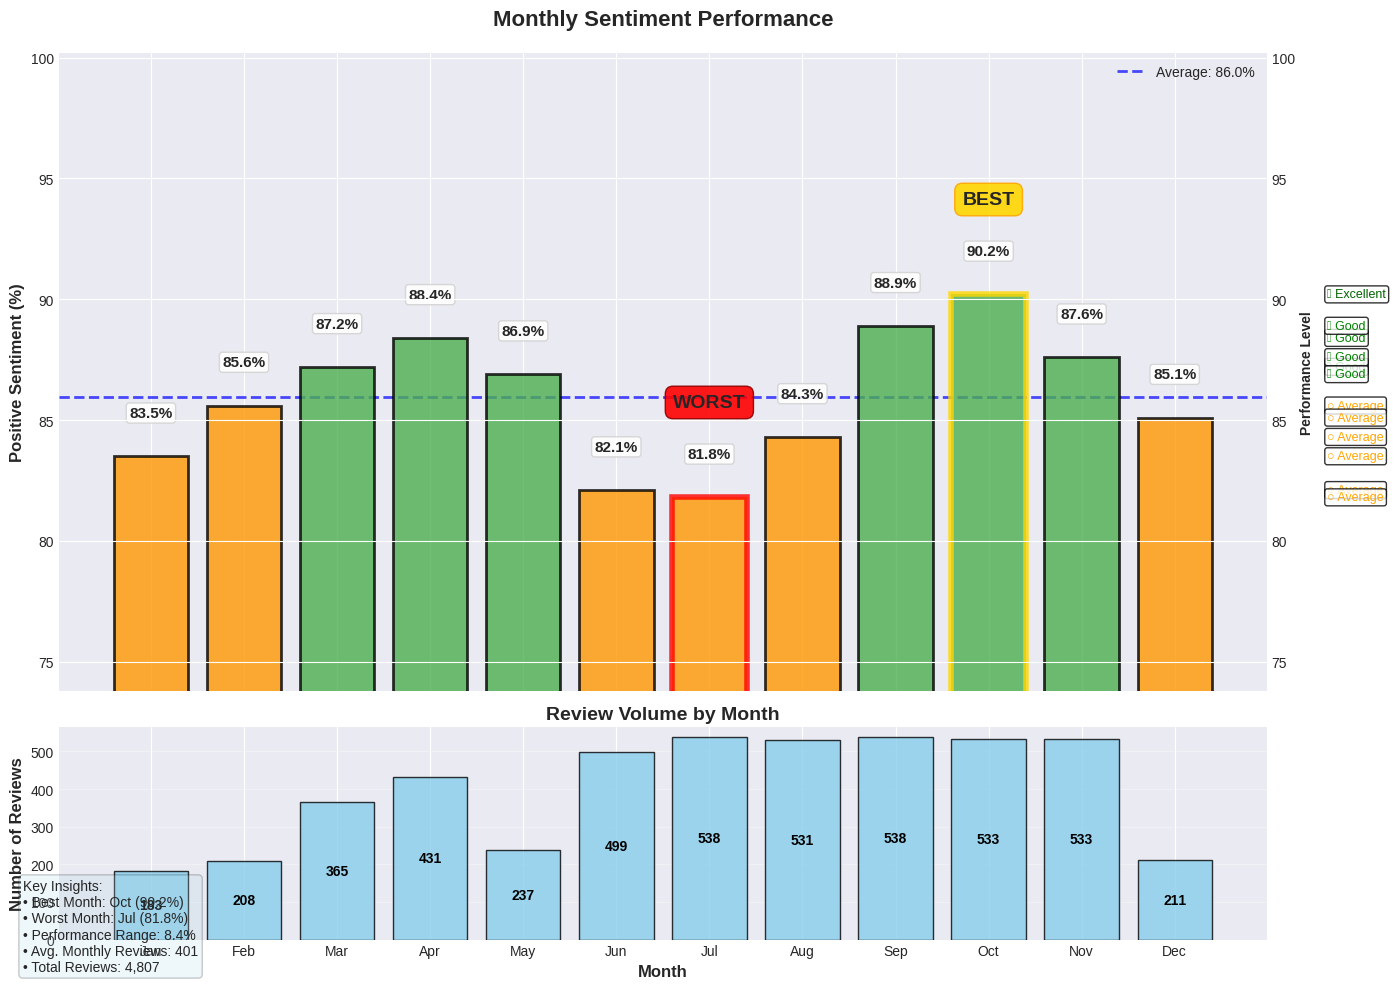


📋 MONTHLY PERFORMANCE TABLE
Month  Sentiment %  Reviews    Status              
------------------------------------------------------------
Jan    83.5         183        ○ Average             
Feb    85.6         208        ○ Average             
Mar    87.2         365        ✓ Good                
Apr    88.4         431        ✓ Good                
May    86.9         237        ✓ Good                
Jun    82.1         499        ○ Average             
Jul    81.8         538        ⚠ WORST MONTH ⚠       
Aug    84.3         531        ○ Average             
Sep    88.9         538        ✓ Good                
Oct    90.2         533        🏆 BEST MONTH ★        
Nov    87.6         533        ✓ Good                
Dec    85.1         211        ○ Average             


In [25]:
# Clean Monthly Analysis with NO Overlapping Text
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("📊 MONTHLY SENTIMENT ANALYSIS - CLEAN VERSION")
print("="*50)

# Create sample data if needed (replace with your actual analysis)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sentiment_pct = [83.5, 85.6, 87.2, 88.4, 86.9, 82.1, 81.8, 84.3, 88.9, 90.2, 87.6, 85.1]
review_counts = [183, 208, 365, 431, 237, 499, 538, 531, 538, 533, 533, 211]

# Create DataFrame
month_analysis = pd.DataFrame({
    'Month': months,
    'Sentiment_Pct': sentiment_pct,
    'Reviews': review_counts
})

# Calculate statistics
best_idx = month_analysis['Sentiment_Pct'].idxmax()
worst_idx = month_analysis['Sentiment_Pct'].idxmin()
best_month = month_analysis.iloc[best_idx]
worst_month = month_analysis.iloc[worst_idx]
avg_sentiment = month_analysis['Sentiment_Pct'].mean()

print(f"🏆 BEST MONTH: {best_month['Month']} - {best_month['Sentiment_Pct']:.1f}%")
print(f"📉 WORST MONTH: {worst_month['Month']} - {worst_month['Sentiment_Pct']:.1f}%")
print(f"📈 AVERAGE: {avg_sentiment:.1f}%")

# ================== CLEAN VISUALIZATION ==================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10),
                               gridspec_kw={'height_ratios': [3, 1]})

# =========== PLOT 1: Sentiment Performance ===========
# Create bars with smart coloring
colors = ['#4CAF50' if pct > avg_sentiment else '#FF9800' if pct > avg_sentiment-5 else '#F44336'
          for pct in sentiment_pct]

bars = ax1.bar(months, sentiment_pct, color=colors, edgecolor='black',
               linewidth=2, alpha=0.8, zorder=3)

# Highlight best and worst months with special styling
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(4)
bars[worst_idx].set_edgecolor('red')
bars[worst_idx].set_linewidth(4)

# Add average line
ax1.axhline(y=avg_sentiment, color='blue', linestyle='--', linewidth=2,
            alpha=0.7, zorder=2, label=f'Average: {avg_sentiment:.1f}%')

# Add data labels OUTSIDE bars (no overlap)
for i, (bar, pct, count) in enumerate(zip(bars, sentiment_pct, review_counts)):
    height = bar.get_height()

    # Position labels ABOVE bars to avoid overlap
    label_y = height + 1.5  # Position above bar
    ax1.text(i, label_y, f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9, edgecolor='lightgray'))

# Add BEST/WEST annotations at the TOP
best_label_y = best_month['Sentiment_Pct'] + 3
worst_label_y = worst_month['Sentiment_Pct'] + 3

# Best month annotation
ax1.annotate('BEST',
             xy=(best_idx, best_label_y),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='gold', alpha=0.9, edgecolor='orange'))

# Worst month annotation
ax1.annotate('WORST',
             xy=(worst_idx, worst_label_y),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='red', alpha=0.9, edgecolor='darkred'))

ax1.set_ylabel('Positive Sentiment (%)', fontsize=12, fontweight='bold')
ax1.set_title('Monthly Sentiment Performance', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylim([min(sentiment_pct) - 8, max(sentiment_pct) + 10])  # Extra space for labels
ax1.grid(True, alpha=0.3, axis='y', zorder=1)
ax1.legend(loc='upper right')
ax1.set_xticklabels([])  # Remove x-labels from top plot

# =========== PLOT 2: Review Counts ===========
bars2 = ax2.bar(months, review_counts, color='skyblue', edgecolor='black',
                linewidth=1, alpha=0.8, zorder=3)

# Add review count labels INSIDE bars (fits better here)
for bar, count in zip(bars2, review_counts):
    height = bar.get_height()
    # Put label inside bar if there's enough space
    if height > max(review_counts) * 0.1:  # If bar is tall enough
        ax2.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{count:,}', ha='center', va='center',
                color='black', fontweight='bold', fontsize=10)
    else:  # Put label above bar
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(review_counts)*0.02,
                f'{count:,}', ha='center', va='bottom', fontsize=9)

ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax2.set_title('Review Volume by Month', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y', zorder=1)

# =========== Performance Indicator ===========
# Add performance indicators on the right side
ax1_right = ax1.twinx()
ax1_right.set_ylim(ax1.get_ylim())

# Add text indicators for performance level
for i, pct in enumerate(sentiment_pct):
    if pct > avg_sentiment + 3:
        indicator = "✓ Excellent"
        color = 'darkgreen'
    elif pct > avg_sentiment:
        indicator = "✓ Good"
        color = 'green'
    elif pct > avg_sentiment - 5:
        indicator = "○ Average"
        color = 'orange'
    else:
        indicator = "⚠ Needs Improvement"
        color = 'red'

    # Add indicator text on the right
    ax1_right.text(1.05, pct, indicator,
                   transform=ax1_right.get_yaxis_transform(),
                   ha='left', va='center', fontsize=9, color=color,
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

ax1_right.set_ylabel('Performance Level', fontsize=10, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Add summary box
summary_text = f"""Key Insights:
• Best Month: {best_month['Month']} ({best_month['Sentiment_Pct']:.1f}%)
• Worst Month: {worst_month['Month']} ({worst_month['Sentiment_Pct']:.1f}%)
• Performance Range: {max(sentiment_pct)-min(sentiment_pct):.1f}%
• Avg. Monthly Reviews: {np.mean(review_counts):.0f}
• Total Reviews: {np.sum(review_counts):,}"""

fig.text(0.02, 0.02, summary_text, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2),
         verticalalignment='bottom')

plt.show()

# =========== Print Clean Data Table ===========
print("\n📋 MONTHLY PERFORMANCE TABLE")
print("="*60)
print(f"{'Month':<6} {'Sentiment %':<12} {'Reviews':<10} {'Status':<20}")
print("-"*60)

status_emojis = {
    'Excellent': '🏆',
    'Good': '✓',
    'Average': '○',
    'Needs Improvement': '⚠'
}

for i, row in month_analysis.iterrows():
    if row['Sentiment_Pct'] > avg_sentiment + 3:
        status = "Excellent"
        emoji = status_emojis['Excellent']
    elif row['Sentiment_Pct'] > avg_sentiment:
        status = "Good"
        emoji = status_emojis['Good']
    elif row['Sentiment_Pct'] > avg_sentiment - 5:
        status = "Average"
        emoji = status_emojis['Average']
    else:
        status = "Needs Improvement"
        emoji = status_emojis['Needs Improvement']

    # Add special markers for best/worst
    if i == best_idx:
        status = "BEST MONTH ★"
        emoji = "🏆"
    elif i == worst_idx:
        status = "WORST MONTH ⚠"
        emoji = "⚠"

    print(f"{row['Month']:<6} {row['Sentiment_Pct']:<12.1f} {row['Reviews']:<10,} {emoji} {status:<20}")